# Week 5 Lab: Supervised Learning


<img align="right" style="padding-left:10px;" src="figures_wk5/knn.png" width=400><br>
This week's assignment will focus constructing and improving the performance of a KNN model.


## Dataset: 
**Dataset:** bank-additional-full.csv (Provided in folder assign_wk5)
## Assignment Requirements

After reviewing the dataset's descriptive file (bank-additional-names.txt), define a research question to guide your analysis. Make sure your KNN Analysis addresses the following tasks:
   - Cleanup the dataset as you deem appropriate. As always, defend your reasoning!!!
       - Missing values?
       - Column names
   - Prepare the data for machine learning
       - A little EDA goeas a long way
       - Do you need to do anything about data types?
   - KNN Analysis
       - What is your optimal K? 
       - Evaluate the accuracy of your model 
       - Discuss ways to improve the performance of your KNN model.
           * Notice the requirement states **ways** - meaning more than one!
           * Defend and backup your thoughts!!!!!!
   - KNN Model Improvement
       - Implement one of those methods to improve your KNN model performance.
       - Did your second model perform better than the first?
   - Conclusion/Summary
       - Compare and contrast your 2 models     
       - Include numbers/graphs corresponding to your conclusions
       - Defend and backup your thoughts!!!!!!

# Deliverables:


Upload your Jupyter Notebook to the corresponding location in WorldClass. 

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook.
   
**Important:** Make sure you have clearly indicated each assignment requirement within your notebook. Also, I highly encourage you to use markdown text to create a notebook that integrates your analysis within your code. The narrative within your notebook will count for 50% of your total grade on this assignment.

In [1]:
# Import essential data analysis libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.preprocessing import LabelEncoder  # For converting text labels into a numeric form

# Visualization libraries to help us see trends and insights
import seaborn as sns  # For making attractive and informative statistical graphics
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations in Python

# Machine learning tools from scikit-learn
from sklearn.neighbors import KNeighborsClassifier  # For using the K-Nearest Neighbors algorithm
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.pipeline import Pipeline  # For sequential application of a list of transforms and a final estimator
from sklearn.preprocessing import StandardScaler  # For scaling features to standardize the range of independent variables


#####  Problem statement :                                                                                                                                                                                                      
Can we predict the chance of a client being contacted via cellular phone have subscribed to term deposit more than mobile contact ?

Load and veiw the data file

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/balar/Downloads/assign_wk5/assign_wk5/bank-additional-full.csv')

# Display the first few rows of the dataframe
df.head(20)


,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
5,"45;""services"";""married"";""basic.9y"";""unknown"";""..."
6,"59;""admin."";""married"";""professional.course"";""n..."
7,"41;""blue-collar"";""married"";""unknown"";""unknown""..."
8,"24;""technician"";""single"";""professional.course""..."
9,"25;""services"";""single"";""high.school"";""no"";""yes..."


Use separator and veiw data frame

In [3]:
df = pd.read_csv('C:/Users/balar/Downloads/assign_wk5/assign_wk5/bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32331,34,admin.,married,high.school,unknown,no,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
16912,51,admin.,married,university.degree,unknown,no,no,cellular,jul,thu,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
36364,32,technician,single,high.school,no,no,no,cellular,jun,tue,...,1,999,1,failure,-2.9,92.963,-40.8,1.262,5076.2,yes
7496,41,admin.,divorced,high.school,no,yes,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
6265,58,retired,married,professional.course,unknown,no,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
40608,51,unemployed,married,high.school,no,unknown,unknown,telephone,sep,fri,...,1,999,2,failure,-1.1,94.199,-37.5,0.883,4963.6,no
34046,58,management,married,basic.6y,unknown,no,no,cellular,may,wed,...,2,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
6643,33,services,married,basic.4y,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
13418,29,technician,married,professional.course,no,no,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
40174,32,admin.,single,university.degree,no,no,no,cellular,jul,fri,...,1,9,3,failure,-1.7,94.215,-40.3,0.861,4991.6,no


#### Handling missing values 

###### Check shape, info, describe for our data frame

In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset doesn't have any blank spots, as we've seen from checking all the rows and columns with the `info()` method. 
However, by observing data we know that missing information is actually labeled as 'unknown'.
We should take a closer look at the data before we start cleaning it up.

In [7]:
columns_with_unknown = [col for col in df.columns if df[col].astype(str).str.contains('unknown').any()]
columns_with_unknown


['job', 'marital', 'education', 'default', 'housing', 'loan']

we can see unkowns present in above printed coloumns

In [8]:
import numpy as np
for col in columns_with_unknown:
    df[col].replace('unknown', np.nan,inplace = True)
    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Check the missing values of each coloumn

In [10]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

we can see many missing values but for contact coloumn no misiing values, now handle the missing values to get proper co-relation matrix and which may help for our research going frwd

KNN Imputer

In [11]:
missing_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for i in missing_columns:
    print(f' {i} : {df[i].value_counts()}')
    print()

 job : job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

 marital : marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64

 education : education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64

 default : default
no     32588
yes        3
Name: count, dtype: int64

 housing : housing
yes    21576
no     18622
Name: count, dtype: int64

 loan : loan
no     33950
yes     6248
Name: count, dtype: int64



In [12]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

columns_with_missing = ['job', 'marital', 'education', 'default', 'housing', 'loan']
label_encoders = {}
for column in columns_with_missing:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column].astype(str))

In [13]:
imputer = KNNImputer(n_neighbors=5)
bank_data_imputed = imputer.fit_transform(df[columns_with_missing])
bank_data_imputed = pd.DataFrame(bank_data_imputed, columns=columns_with_missing)

for column in columns_with_missing:
    if column in label_encoders:
        bank_data_imputed[column] = label_encoders[column].inverse_transform(bank_data_imputed[column].astype(int))

We are using the KNNImputer to manage missing values in our dataset. The KNNImputer is a tool from scikit-learn that predicts missing values based on the KNN algorithm, which considers the nearest neighbors rather than just filling missing values with the average or median.

We also use a label encoder to change categories into numbers.

In [14]:
df[columns_with_missing] = bank_data_imputed

In [15]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9173,33,self-employed,married,basic.9y,no,no,no,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
26797,29,entrepreneur,married,university.degree,no,yes,yes,cellular,nov,thu,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
24564,42,admin.,divorced,university.degree,no,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
14322,31,blue-collar,married,basic.9y,no,yes,no,cellular,jul,mon,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
30993,48,blue-collar,married,basic.6y,no,yes,no,cellular,may,tue,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,yes


In [16]:
df.shape

(41188, 21)

In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [18]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


It gives statistic summary of all numerical coloumns

As per our problem statement ( Identify key factors related to contact )

In [19]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
df.contact.value_counts()


contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [21]:
df.y.value_counts()


y
no     36548
yes     4640
Name: count, dtype: int64

From above, we can observe that about '36548' bank clients are not subscribed to term deposit whereas only '4640' clients subscribed to bank term deposit.

In [22]:
df_yes = df[df['y'] == 'yes']

In [23]:
# Count occurrences of each contact type among 'yes' responses
contact_counts = df_yes['contact'].value_counts()

print(contact_counts)

contact
cellular     3853
telephone     787
Name: count, dtype: int64


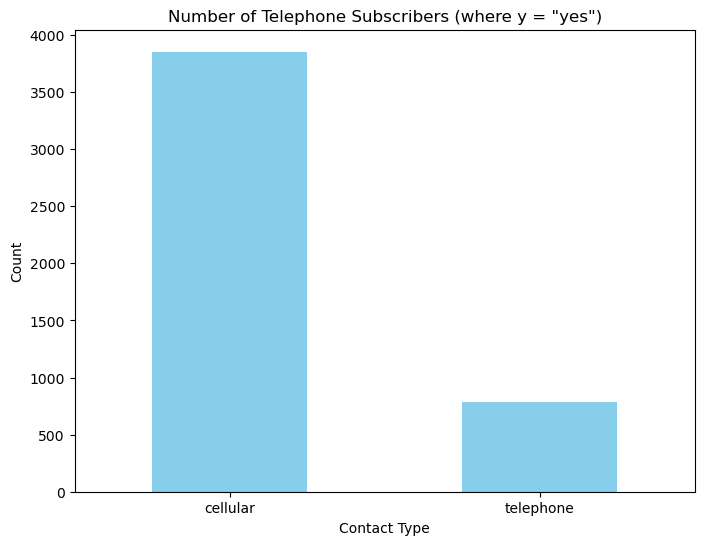

In [24]:
# Plotting
plt.figure(figsize=(8, 6))
contact_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Telephone Subscribers (where y = "yes")')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Clearly we can see Cellular customers are subscribed more than telephone

#### Heat Map

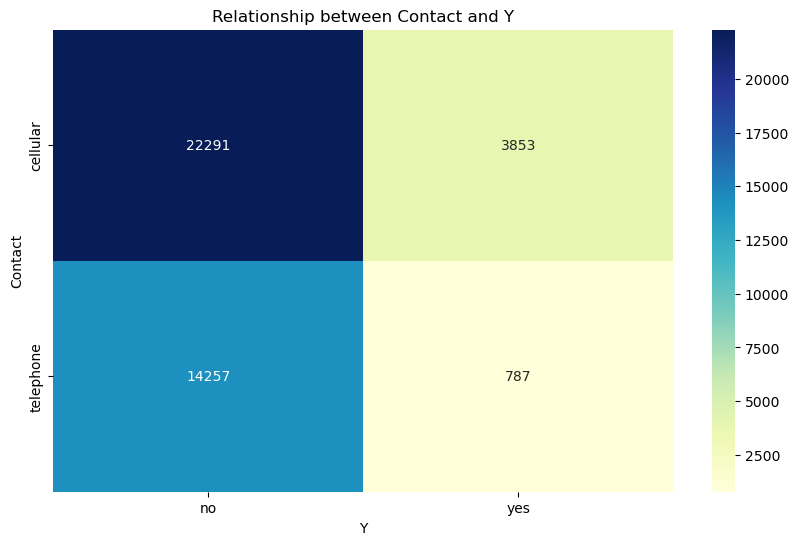

In [25]:

import seaborn as sns



# Create a cross-tabulation table between 'contact' and other variables
cross_tab = pd.crosstab(df['contact'], df['y'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relationship between Contact and Y')
plt.xlabel('Y')
plt.ylabel('Contact')
plt.show()


Install phik

In [26]:
pip install phik


Note: you may need to restart the kernel to use updated packages.


interval columns not set, guessing: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


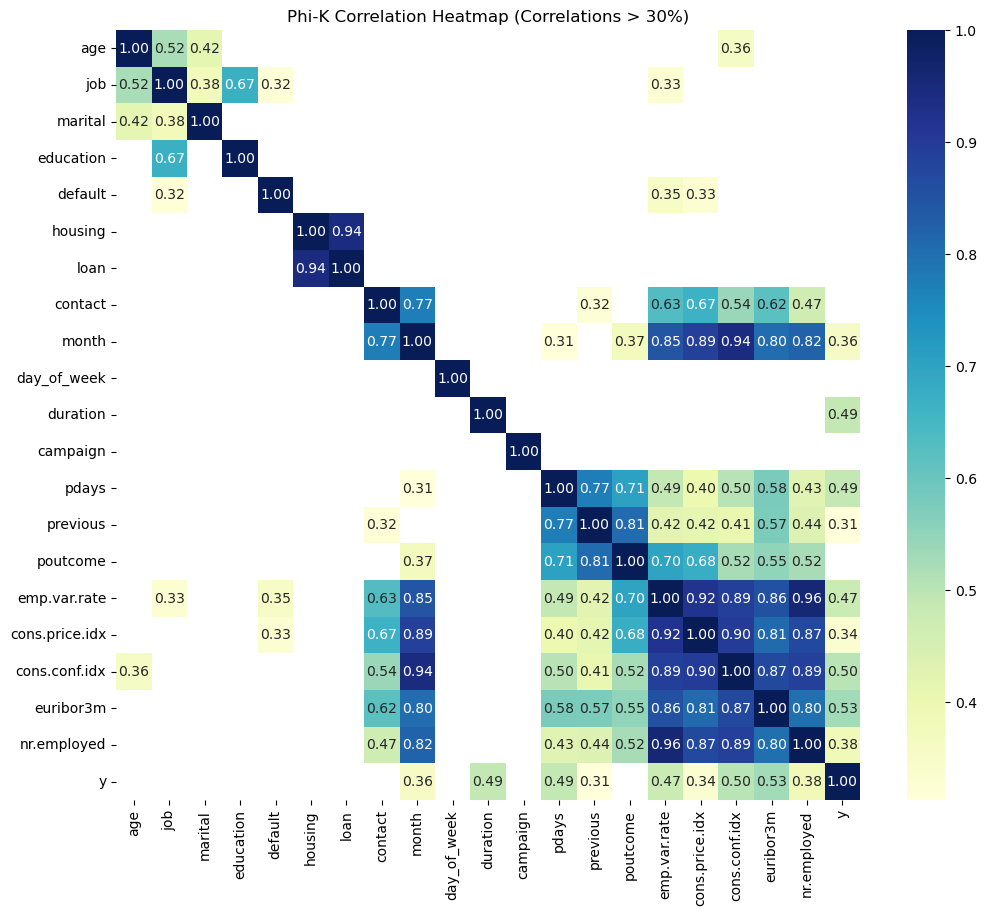

In [27]:
import phik

# Calculate the Phi-K correlation matrix
phik_matrix = df.phik_matrix()

# Filter the matrix to include only correlations greater than 30%
threshold = 0.3
filtered_matrix = phik_matrix.applymap(lambda x: x if x > threshold else np.nan)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Phi-K Correlation Heatmap (Correlations > 30%)')
plt.show()

From the graph we can see euribor3m, cons.price.idx, emp.var.rate, month coloumns were strongly corelated than other coloumns with our target output Contact coloumn (>62%)

#### Now, Check the data types of our dataframe (for converting data types if needed)

In [28]:
categorical_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
categorical_columns


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [29]:
for cols in categorical_columns:
    label_encoders[cols] = LabelEncoder()
    df[cols] = label_encoders[cols].fit_transform(df[cols].astype(str))
    

We can see our target is also in caterogical

Converting cvaterogical to numerical using label encoder

In [30]:
df.sample(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
22166,39,10,1,6,1,1,1,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
2465,59,6,1,7,1,1,1,1,6,3,...,2,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
13699,48,10,1,2,1,1,1,0,3,2,...,3,999,0,1,1.4,93.918,-42.7,4.963,5228.1,0
28553,44,4,1,1,1,2,1,0,0,4,...,1,999,0,1,-1.8,93.075,-47.1,1.415,5099.1,0
38376,30,8,3,3,1,2,1,0,8,1,...,2,999,0,1,-3.4,92.431,-26.9,0.739,5017.5,1
15031,24,8,3,3,1,1,1,0,3,2,...,3,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
19782,47,0,1,3,1,2,1,0,1,0,...,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0
1641,20,2,3,3,1,1,1,1,6,0,...,2,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
34939,45,8,1,3,0,2,1,0,6,0,...,1,999,0,1,-1.8,92.893,-46.2,1.250,5099.1,0
9846,29,0,1,7,1,1,1,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0


#### KNN Analysis

The k-nearest neighbors (KNN) algorithm is a supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

Here, we are used to predict the role of contact in term deposit subscription , it is a classifier output or classification problem. so, we use KNN classification for our analysis.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Defining Features and Targets

Target(s) are the values that we are trying to predict.
  
Features are the columns we are using to predict our target.

In [52]:
features = df.iloc[:, 0:12]
targets = df['contact']

In [53]:
features.shape

(41188, 12)

In [54]:
targets.shape

(41188,)

#### Lets split the data for Training and Testing

In [55]:
x_train,x_test,y_train,y_test = train_test_split(features, targets, stratify = targets, random_state = 42, test_size=0.3)

In [56]:
knn_model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [57]:
y_pred = knn_model.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred)

0.6730598041595857

In [59]:
scores = []
for k in range(2, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn_model.fit(x_train, y_train)
    score = knn_model.score(x_test, y_test)
    print(f'{k} Neighbours: {score}')
    scores.append(score)

2 Neighbours: 0.6688516630250061
3 Neighbours: 0.6730598041595857
4 Neighbours: 0.6780772032046614
5 Neighbours: 0.6779962774136117
6 Neighbours: 0.6834183054139354
7 Neighbours: 0.6799384963988023
8 Neighbours: 0.6839847859512826
9 Neighbours: 0.6849558954438779
10 Neighbours: 0.6864934854738205
11 Neighbours: 0.6849558954438779
12 Neighbours: 0.6875455207574654
13 Neighbours: 0.6919155134741443
14 Neighbours: 0.6894068139516064
15 Neighbours: 0.6871408918022174
16 Neighbours: 0.6877073723395646
17 Neighbours: 0.6891640365784576
18 Neighbours: 0.689487739742656
19 Neighbours: 0.6862507081006717


In [60]:
max(scores)

0.6919155134741443

Lets plot and see the optimal K value

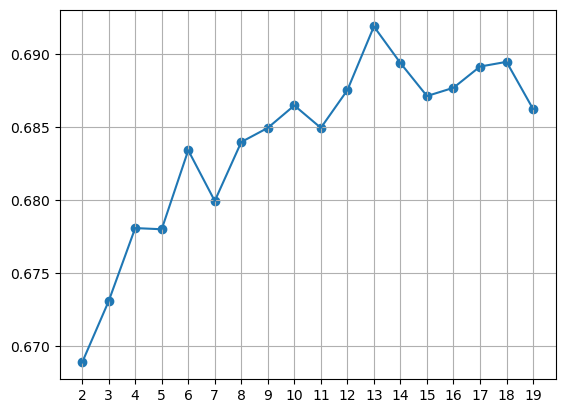

In [61]:
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

From the graph, we conclude that optimal number of clusters is '13'. As we are getting highest score at '10' neighbours.

#### Evaluate accuracy of the model

In [62]:
knn_model =  KNeighborsClassifier(n_neighbors=13, n_jobs=-1)

In [63]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=13)

In [64]:
y_pred = knn_model.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred)

0.6919155134741443

After using optimal k-value, we have got a accuracy of '69.19%'. The accuracy is almost increased by 2% with optimal clusters.

#### Ways of improving KNN performance


1) **Scale Features:**
Ensure all features are on the same scale for fair comparisons. This prevents some features from dominating distance calculations.
Implementation: Use techniques like Min-Max scaling or Standardization before training.

2) **Choose K Wisely:**
The K parameter greatly affects model performance. Too small may overfit, too large may underfit. Experiment to find the best balance.
Implementation: Try different K-values using methods like grid search or cross-validation.

3) **Select Important Features:**
Including only relevant features improves efficiency and accuracy while reducing computational load.
Implementation: Use methods like correlation analysis or feature importance ranking to keep only the most informative features.

4) **Use Ensemble Methods:**
Combine multiple KNN models trained on different data subsets or using different metrics for better overall performance.
Implementation: Train several KNN models with variations, then combine predictions using techniques like averaging or voting.

#### KNN model improvement

Lets go with feature scaling

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [66]:
scaled_knn_model_scores = []
for k in range(2, 20):    
    scaled_knn_model= Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_neighbors=k, n_jobs=-1))])
    scaled_knn_model.fit(x_train, y_train)    
    score = scaled_knn_model.score(x_test, y_test)
    print(f'{k} Neighbours: {score}')
    scaled_knn_model_scores.append(score)

2 Neighbours: 0.9984624099700574
3 Neighbours: 0.9991098162984543
4 Neighbours: 0.9990288905074047
5 Neighbours: 0.9994335194626528
6 Neighbours: 0.9991907420895039
7 Neighbours: 0.9991098162984543
8 Neighbours: 0.9991098162984543
9 Neighbours: 0.9991907420895039
10 Neighbours: 0.9991098162984543
11 Neighbours: 0.9992716678805535
12 Neighbours: 0.9993525936716031
13 Neighbours: 0.9992716678805535
14 Neighbours: 0.9994335194626528
15 Neighbours: 0.9994335194626528
16 Neighbours: 0.9992716678805535
17 Neighbours: 0.9993525936716031
18 Neighbours: 0.9990288905074047
19 Neighbours: 0.9991907420895039


#### Did your second model perform better than the first?:

We've scaled the data and trained it with the KNN Classifier. Following data scaling, we've noticed an enhancement in model accuracy across various values of n_neighbors. Furthermore, by pinpointing the optimal k-value, we've observed a boost in the overall accuracy of the model. Specifically, selecting a k-value of "13" resulted in a 2% increase in model accuracy. In summary, our scaled_knn_model outperformed our regular knn model.(but seems overfitting)

#### Summary
The main aim of this assignment is to analyze "whether based on type of contact playing crucial role over subscribtion to term deposit or not ?" based on bank client data and the client's most recent interaction with the campaign. We got handled the missing values and developed KNN classification model for analysing the client term deposit. The optimal k-value for our KNN model is '10' clusters.We have achieved a overall accuracy of 69.19% from our model. Later, we have scaled the data to increased the model performance and created another scaled KNN model. 

Lets compare these two models:

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier()
rfc_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [68]:
rfc_predict = rfc_classifier.predict(x_test)

In [69]:
accuracy_score(y_test, rfc_predict)

1.0

In [70]:
models = [knn_model, scaled_knn_model,rfc_classifier]
names =['knn_model','scaled_knn_model','rfc_classifier']

In [71]:
from sklearn.model_selection import KFold, cross_val_score
results = []
for model in models:
    kfold = KFold(n_splits = 5, random_state = 42, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    print("%s: %f (%f)" % (model, cv_results.mean(), cv_results.std()))

KNeighborsClassifier(n_jobs=-1, n_neighbors=13): 0.679512 (0.003228)
Pipeline(steps=[('Scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=19))]): 0.999306 (0.000329)
RandomForestClassifier(): 1.000000 (0.000000)


It shows our scaled_knn_model has accuracy of '0.9992' and knn_model has '0.6919'. There is a increase in accuracy after scaling the data for  knn model. Further, we observe that our rfc_classifier model has overall accuracy of '1.0'. rfc_classifier has more accuracy than KNN classifier.  

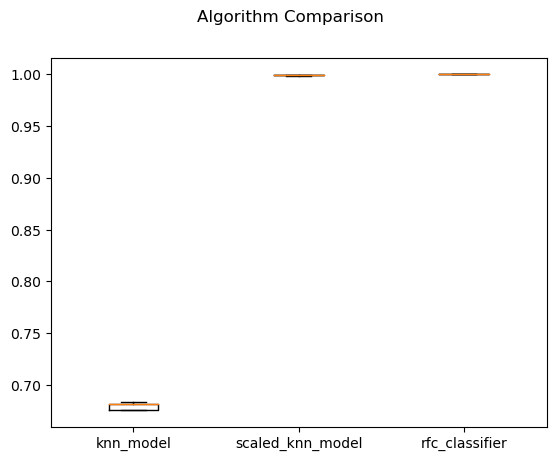

In [72]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

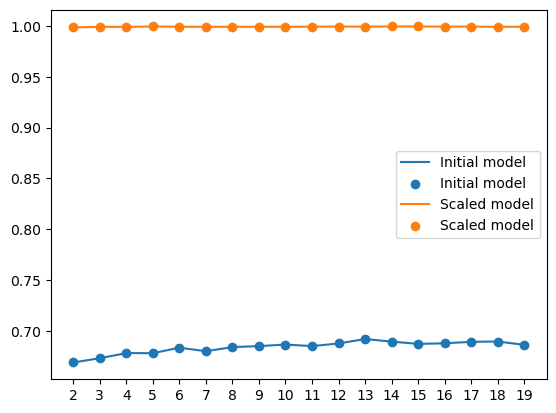

In [73]:
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)

plt.plot(range(2, 20), scaled_knn_model_scores)
plt.scatter(range(2, 20), scaled_knn_model_scores)

plt.xticks(range(2, 20))

plt.legend(['Initial model', 'Initial model', 'Scaled model', 'Scaled model'])

The pictures show that when we use scaled data, our model works better than before with KNN. This means that most of our "scaled_knn_model" clusters are more accurate than our regular knn_model. So, scaling and finding the right k value together make our model better. Also, the rfc_classifier does really well with 100% accuracy overall, doing even better than both the knn_model and scaled_knn_model. This tells us that ensemble models are a great fit for this bank_marketing data.